# Download Module from Library

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow
%pip install keras_preprocessing
%pip install wordcloud
%pip install nltk
%pip install seaborn
%pip install scikit-learn
%pip install confusion-matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 202.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 3.5 MB/s eta 0:00:00
  Created wheel for confusion-matrix: filename=confusion_matrix-0.1-py3-none-any.whl size=2400 sha256=dca7b01b250f29cfdc66f823b288d44db12e078db169c452aaeba377ecde876b
  Stored in directory: /root/.cache/pip/wheels/2a/86/a7/df011be982e86cf5084b4e47b183f46b0773f928abb5c12adb
Successfully built confusion-matrix


In [ ]:
# penting execute ini untuk mencegah error di preprocessing
%pip install emoji
%pip install PySastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# Read CSV

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read CSV from sample data
data = pd.read_csv('../dataset/PRDECT-ID.csv')

# Data Understanding

In [5]:
display(data.head(1))
data.columns

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy


Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')

In [6]:
kamus_alay = pd.read_csv('../dataset/kamusalay.csv', encoding='ISO-8859-1', header = None)
kamus_alay_dict = kamus_alay.set_index(0).to_dict('dict')[1]

# Data Selecting

In [7]:
from collections import Counter
data = pd.DataFrame(data)
data = data[['Customer Review', 'Emotion']]
print(data)
print(data['Emotion'].value_counts())
print(Counter(data['Emotion']))

# data = data[['Customer Review', 'Sentiment']]
# print(data['Sentiment'].value_counts())
# print(Counter(data['Sentiment']))

                                        Customer Review Emotion
0     Alhamdulillah berfungsi dengan baik. Packaging...   Happy
1     barang bagus dan respon cepat, harga bersaing ...   Happy
2     barang bagus, berfungsi dengan baik, seler ram...   Happy
3     bagus sesuai harapan penjual nya juga ramah. t...   Happy
4     Barang Bagus, pengemasan Aman, dapat Berfungsi...   Happy
...                                                 ...     ...
5395  Harga bersaing, barang sesuai pesanan. Saya na...    Love
5396  Beli ini krn Anak & Istri mau liburan di Jakar...    Love
5397  pengemasan barang baik, kondisi barang jg utuh...   Happy
5398  Mungil tapi bekerja dng baik. Dan murahh terja...   Happy
5399  Produk sesuai deskripsi, packing aman terlindu...    Love

[5400 rows x 2 columns]
Emotion
Happy      1770
Sadness    1202
Fear        920
Love        809
Anger       699
Name: count, dtype: int64
Counter({'Happy': 1770, 'Sadness': 1202, 'Fear': 920, 'Love': 809, 'Anger': 699})


# Data Cleaning

## Preprocessing
The second preprocessing step is to convert the data into a format that can be used by the machine learning

### Text Processing

In [8]:
import string
import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

for lol in StopWordRemoverFactory().get_stop_words():
  print(lol)
# print(StopWordRemoverFactory().get_stop_words())

a
ada
adalah
adanya
adapun
agak
agaknya
agar
akan
akankah
akhir
akhiri
akhirnya
aku
akulah
amat
amatlah
anda
andalah
antar
antara
antaranya
apa
apaan
apabila
apakah
apalagi
apatah
arti
artinya
asal
asalkan
atas
atau
ataukah
ataupun
awal
awalnya
b
bagai
bagaikan
bagaimana
bagaimanakah
bagaimanapun
bagainamakah
bagi
bagian
bahkan
bahwa
bahwasannya
bahwasanya
baik
baiklah
bakal
bakalan
balik
banyak
bapak
baru
bawah
beberapa
begini
beginian
beginikah
beginilah
begitu
begitukah
begitulah
begitupun
bekerja
belakang
belakangan
belum
belumlah
benar
benarkah
benarlah
berada
berakhir
berakhirlah
berakhirnya
berapa
berapakah
berapalah
berapapun
berarti
berawal
berbagai
berdatangan
beri
berikan
berikut
berikutnya
berjumlah
berkali-kali
berkata
berkehendak
berkeinginan
berkenaan
berlainan
berlalu
berlangsung
berlebihan
bermacam
bermacam-macam
bermaksud
bermula
bersama
bersama-sama
bersiap
bersiap-siap
bertanya
bertanya-tanya
berturut
berturut-turut
bertutur
berujar
berupa
besar
betul
betulkah
biasa

In [11]:
# Preprocessing 2 tanpa menggunakan kamus kata baku

def process_cleaning2(text):

    # Remove Emoji
    # text = emoji.demojize(text)

    # text_lower = text_strip.casefold()

    # remove emoji spesifik, angka, url dulu
    text_cleaning_re = r"rt|url|[^\w\s]|'|nbsp|https\S+|[0-9]+"
    text_sub = re.sub(text_cleaning_re, ' ', str(text))

    # Remove strip / trims
    text_strip = text_sub.strip()

    # remove punctutation/simbolll
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = text_strip.translate(translator)

    # print("strip:",text_strip)
    # print("cleaned:",text_strip)
    # Lower Case
    text_lower = text_no_punct.casefold()

    # tokenize
    text_token_stan = word_tokenize(text_lower)

     #ganti kata gk baku
    # tokensAfterReplace = []
    # for token in text_token_stan:
    #   token = kamus_dict.get(token, token)
    #   tokensAfterReplace.append(token)
    # textMerged = " ".join(tokensAfterReplace)

    # tambah kata singkatan =
    more_stopword = ["kalo", "aja","sih","tu","ku","pa","bgt","udah", "yg", "ga", "gak", "tdk", "tp", "sy","gk", "nya", "jg", "dgn"]
    # more_stopword = ["kalo", "aja","yang","saja","sih","tu","ku","pa","bgt","udah","dan","di"]
    # more_stopword = ["kalo","aja","saja","sih","tu","dan", "di"]

    # menampung stopword ke variabel untuk jadi operator remove stopword
    stopword_user = StopWordRemoverFactory().get_stop_words() + more_stopword
    # stopword_user = StopWordRemoverFactory().get_stop_words()

    # wordStandard = []
    # for word in cleaned_text.split(" "):
    #     if word != "":
    #         wordStandard.append(word)
    # wordStandard = [word for word in wordStandard if word not in stopword_user]
    # tokens = " ".join(wordStandard)

    # alternatif untuk perbaiki akurasi
    # word_new = []
    # for word in text_token_stan:
    #     if not word in stopword_user:
    #         word = kamus_alay_dict.get(word, word)
    #         word_new.append(word)
    # tokens = " ".join(word_new)

    # alternatif 2 untuk perbaiki akurasi
    #  Remove StopWord jika ada kata dari token_word yang match dengan kata2 dari stopword yg diset bindo
    filter_new = []
    filter_new = [word for word in text_token_stan if not word in stopword_user]
    tokens = " ".join(filter_new)

    # filter_new = []
    # filter_new = [word for word in word_tokenize(textMerged) if not word in stopword_user]
    # tokens = " ".join(filter_new)

    return tokens

In [10]:
# pake kamus alay

def process_cleaning(text):

    # remove emoji spesifik, angka, url dulu
    text_cleaning_re = r"rt|url|[^\w\s]|'|nbsp|https\S+|[0-9]+"
    text_sub = re.sub(text_cleaning_re, ' ', str(text))

    # Remove strip / trims
    text_strip = text_sub.strip()

    # remove punctutation/simbolll
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = text_strip.translate(translator)

    # Lower Case
    text_lower = text_no_punct.casefold()

    # tokenize
    text_token_stan = word_tokenize(text_lower)

    word_dict = []
    for word in text_token_stan:
        word_dict.append(kamus_alay_dict.get(word, word))
    tokens = " ".join(word_dict)

    # tambah kata singkatan =
    more_stopword = ["sih","nya"]

    # menampung stopword ke variabel untuk jadi operator remove stopword
    stopword_user = StopWordRemoverFactory().get_stop_words() + more_stopword
    # stopword_user = StopWordRemoverFactory().get_stop_words()

    # alternatif untuk perbaiki akurasi
    token_new = word_tokenize(tokens)
    filter_new = []
    filter_new2 = [word.strip() for word in token_new]
    filter_new = [word for word in filter_new2 if not word in stopword_user]
    tokens = " ".join(filter_new)

    return tokens

In [12]:
import numpy as np
import string

data['cleaned without dict'] = data['Customer Review'].apply(process_cleaning2)
data['cleaned with dict'] = data['Customer Review'].apply(process_cleaning)
# print(list(data["processed_cleaning"]))

# x_cleaned = data['cleaned']
x_cleaned = data['cleaned with dict']
x_cleaned2 = data['cleaned without dict']
# x_cleaned = data["cleaned"].values
data.head(10)

,Customer Review,Emotion,cleaned without dict,cleaned with dict
0,Alhamdulillah berfungsi dengan baik. Packaging...,Happy,alhamdulillah berfungsi packaging aman respon ...,alhamdulillah berfungsi packaging aman respon ...
1,"barang bagus dan respon cepat, harga bersaing ...",Happy,barang bagus respon cepat harga bersaing,barang bagus respon cepat harga bersaing
2,"barang bagus, berfungsi dengan baik, seler ram...",Happy,barang bagus berfungsi seler ramah pengiriman ...,barang bagus berfungsi seler ramah pengiriman ...
3,bagus sesuai harapan penjual nya juga ramah. t...,Happy,bagus sesuai harapan penjual ramah trimakasih ...,bagus sesuai harapan penjual ramah terima kasi...
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Happy,barang bagus pengemasan aman berfungsi,barang bagus pengemasan aman berfungsi
5,"barang bagus, seller ramah..",Happy,barang bagus seller ramah,barang bagus seller ramah
6,mantap paten joss,Happy,mantap paten joss,mantap paten joss
7,"Works fine. Respon seller cepat, barang berfun...",Happy,works fine respon seller cepat barang berfungs...,works fine respon seller cepat barang berfungs...
8,barang bagus.. segel.. utuh.. original.. berfu...,Happy,barang bagus segel utuh original berfungsi ben...,barang bagus segel utuh original berfungsi sel...
9,Barang datang dan berfungsi dengan baik dan te...,Happy,barang berfungsi bagus lampu birunya,barang berfungsi bagus lampu birunya


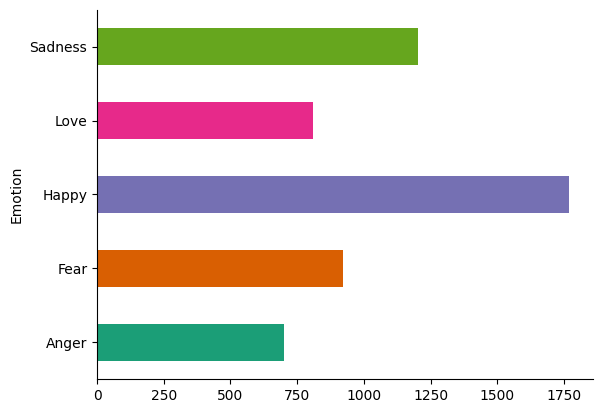

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Word Cloud

Before Preprocessing


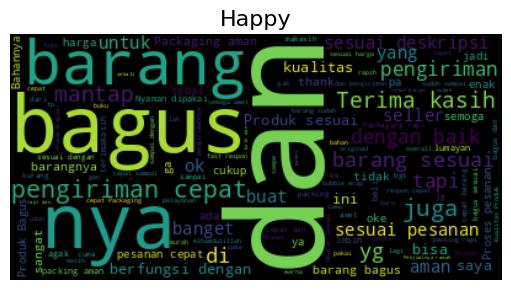

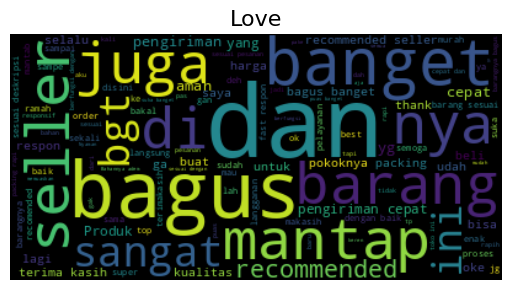

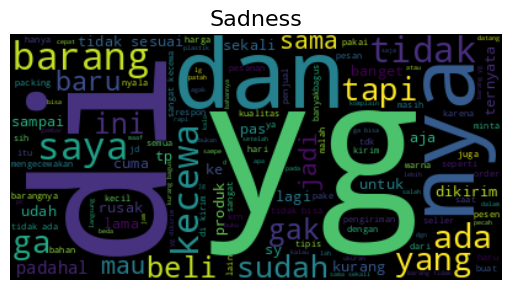

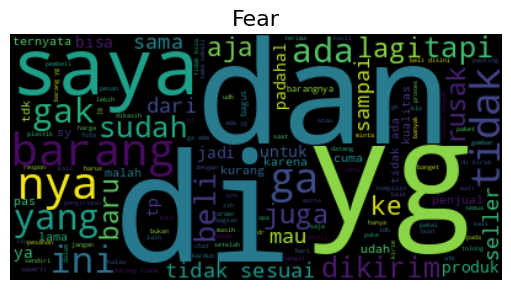

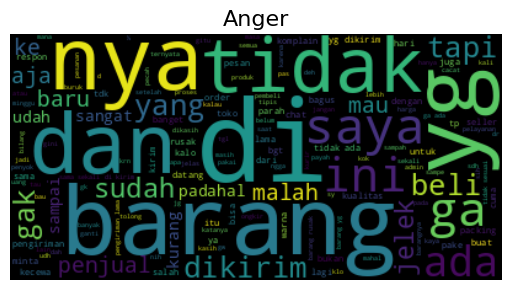

In [ ]:
import wordcloud
from wordcloud import WordCloud

def process_wordCloud(value, emot):
    wordcloud = WordCloud(background_color = "black", max_words = 150).generate(value)
    fig = plt.figure(figsize = (5, 3))
    fig.set_layout_engine('constrained')
    plt.imshow(wordcloud, interpolation = "bilinear", alpha = 1)
    plt.title(emot, size=16)
    plt.axis("off")
    # plt.tight_layout(pad=3)
    plt.show()
    print()
    return fig

emotions = ['Happy', 'Love', 'Sadness', 'Fear', 'Anger']

text_mixed_bef = ""

print("Before Preprocessing")
for emotion in emotions:
  input_emot = " ".join([emot for emot in data.loc[data['Emotion'] == emotion, 'Customer Review']])
  non_preprocess_wc = process_wordCloud(input_emot, emotion)
  text_mixed_bef += input_emot

After Preprocessing


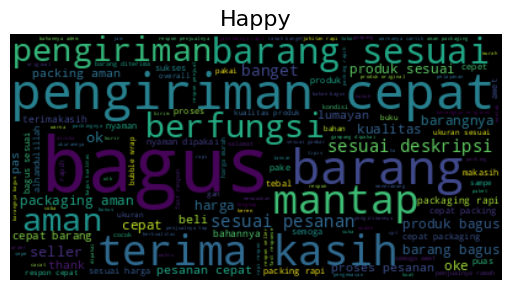

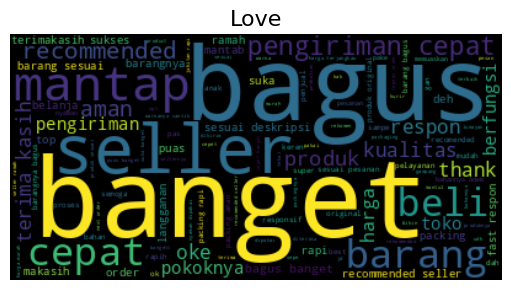

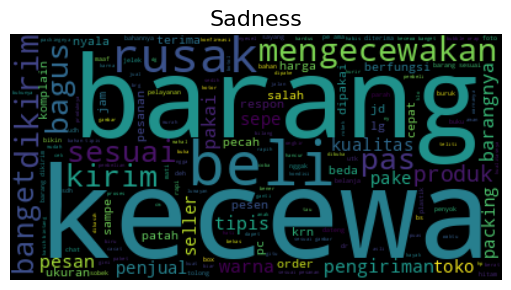

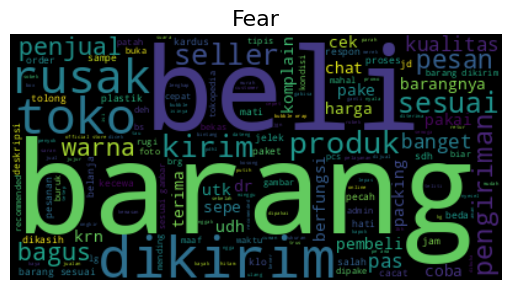

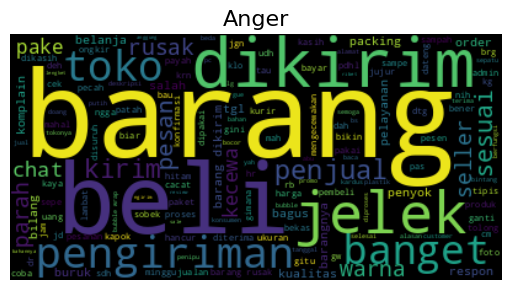

In [ ]:
print("After Preprocessing")
text_mixed_aft = ""
for emotion in emotions:
  input_emot = " ".join([emot for emot in data.loc[data['Emotion'] == emotion, 'Customer Review']])
  CR_cleaned = process_cleaning2(input_emot)
  process_wc = process_wordCloud(CR_cleaned, emotion)
  text_mixed_aft += CR_cleaned

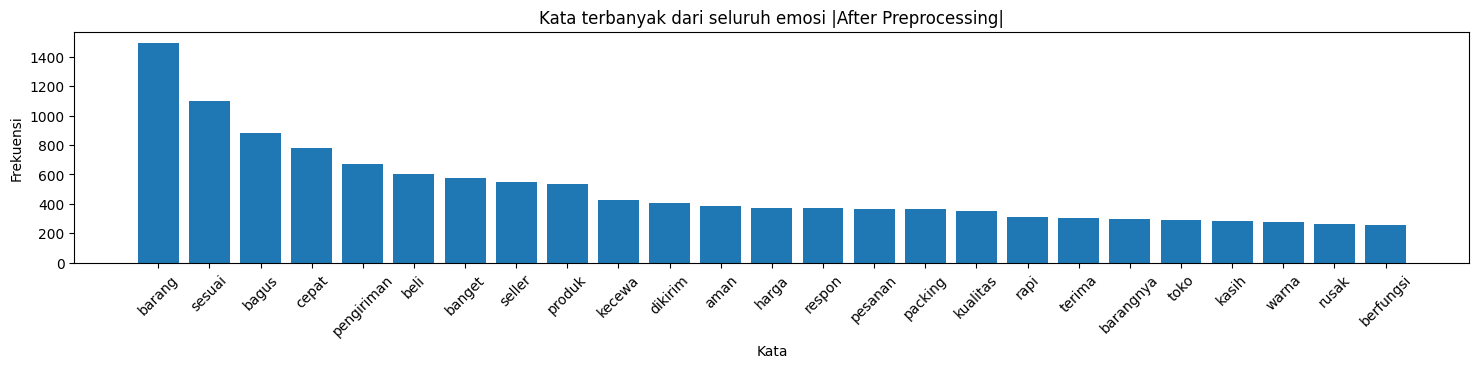

In [ ]:
# Plotting most common words in the database with their frequency
text_list = text_mixed_aft.split()

word_data = Counter(text_list).most_common(25)

plt.figure(figsize=(18, 3))
plt.bar(*zip(*word_data))
plt.title('Kata terbanyak dari seluruh emosi |After Preprocessing|')
plt.xticks(rotation=45)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.show()

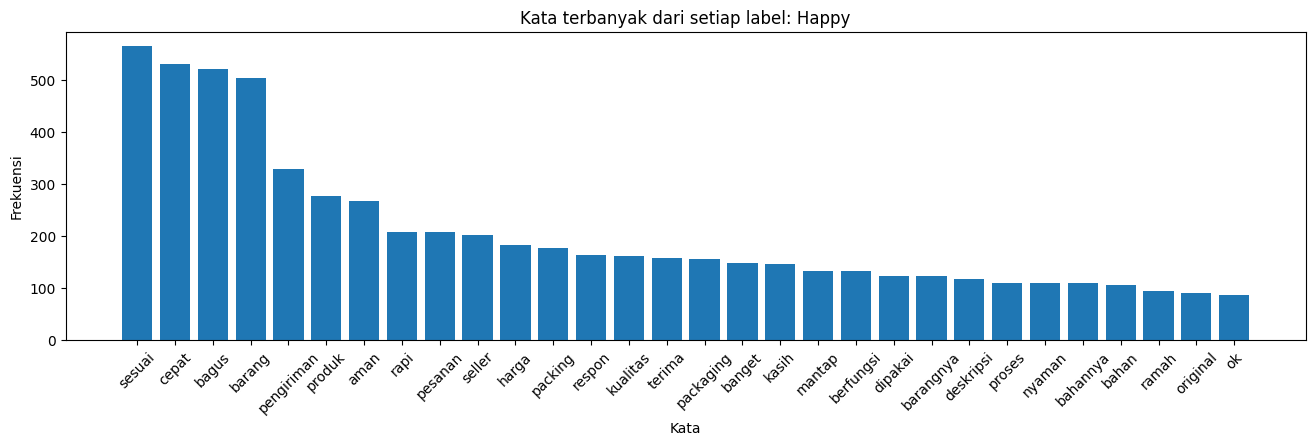

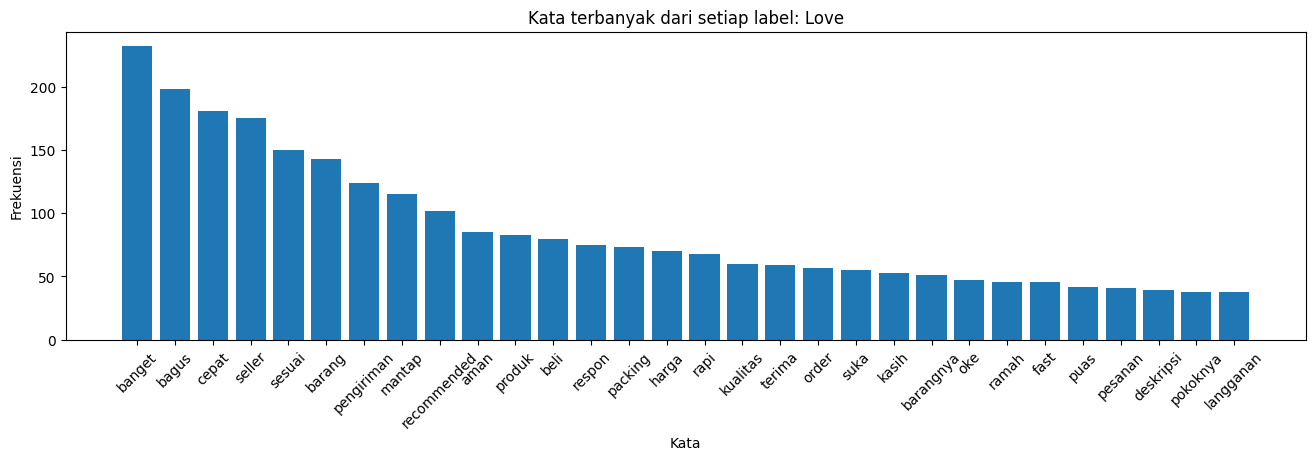

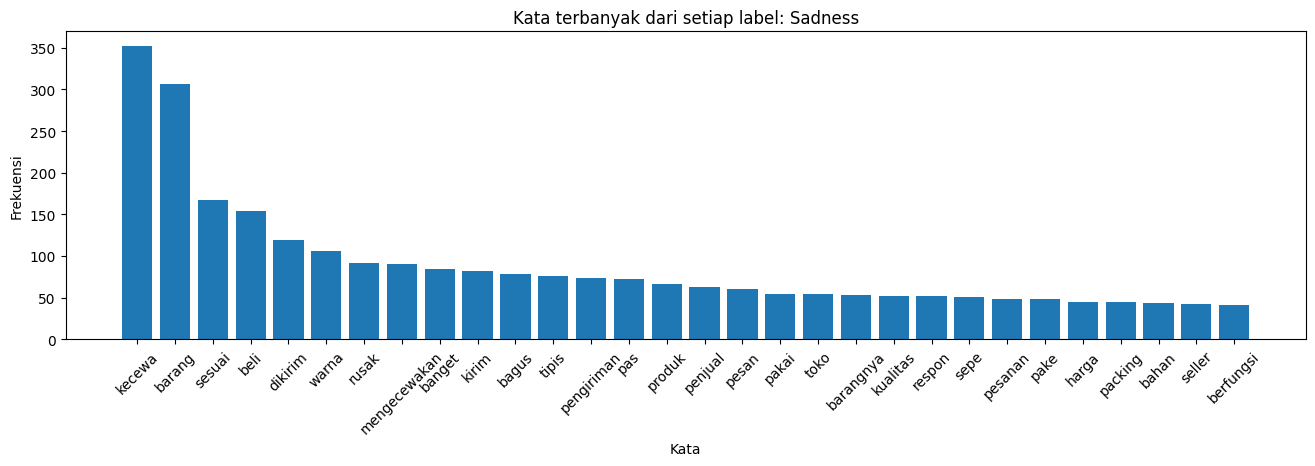

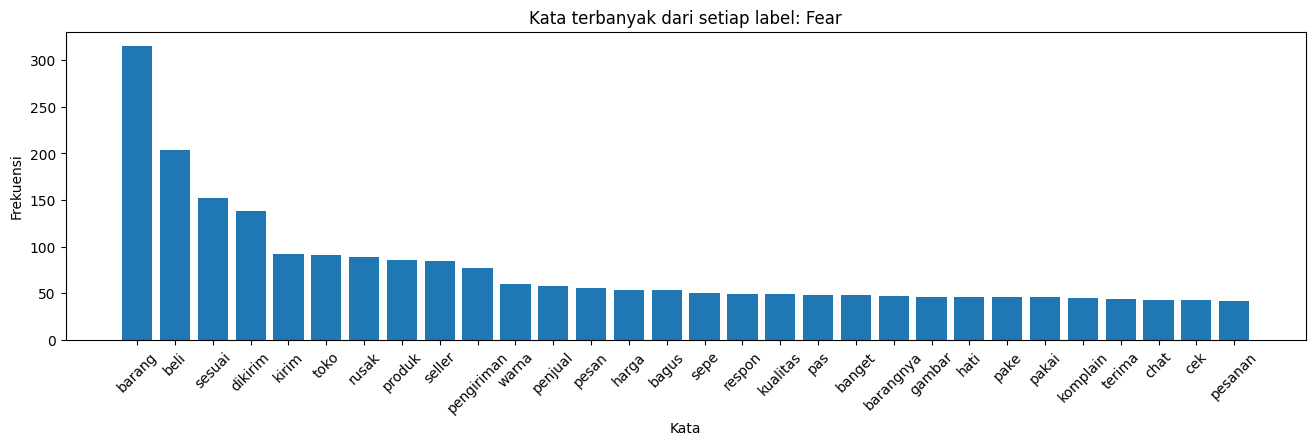

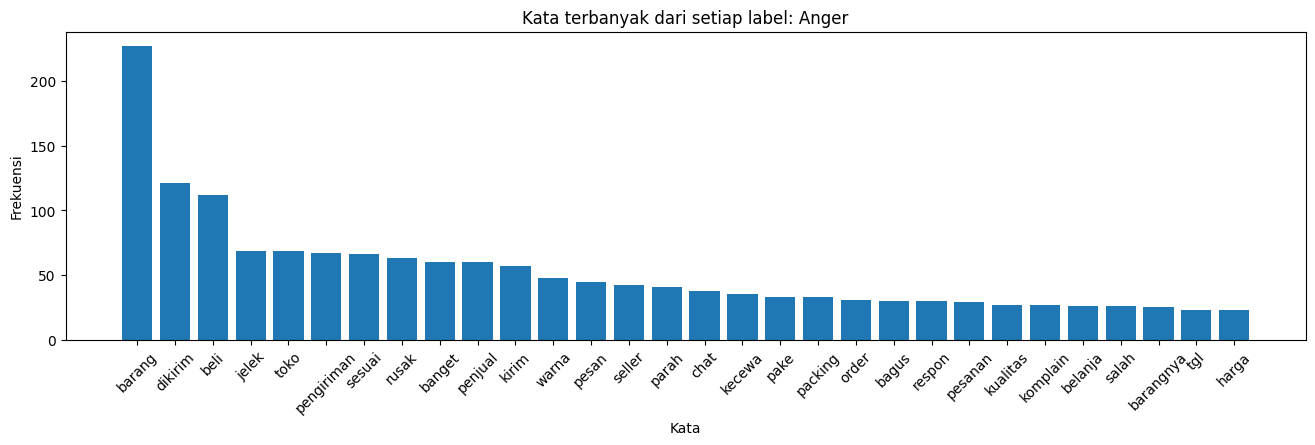

In [ ]:
text_container = []
for emotion in emotions:
  text_container = " ".join([emot for emot in data.loc[data['Emotion'] == emotion, 'Customer Review']])
  text_cleaned = process_cleaning2(text_container)
  text_split = text_cleaned.split()
  word_data = Counter(text_split).most_common(30)

  plt.figure(figsize=(16, 4))
  plt.bar(*zip(*word_data))
  plt.title('Kata terbanyak dari setiap label: ' + emotion)
  plt.xticks(rotation=45)
  plt.xlabel("Kata")
  plt.ylabel("Frekuensi")
  plt.show()
  print()

## Data Constructing
Data Transformation -
Data Transformation is the process of converting data from one format to another. This can include data cleaning,

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
print(Counter(data["Emotion"]))
label_encoder = LabelEncoder()
data["emotion"] = label_encoder.fit_transform(data["Emotion"])
# print(data["emotion"].value_counts())
print(Counter(data["emotion"]))
y_replaced = data["emotion"]
print(y_replaced)

# y_replaced  = list(data["emotion"])
# print(y_replaced)
# print(data["emotion"])
# print(data["emotion"].values)

# y_replaced = data["Emotion"].replace({'Anger': '0', 'Fear': '1', 'Sadness': '2', 'Happy': '3', 'Love': '4'})
# print(y_replaced.value_counts())
# y_replaced  = list(y_replaced)

# Test Sentiment
# print(Counter(data['Sentiment']))
# label_encoder = LabelEncoder()
# data['Sentiment'] = label_encoder.fit_transform(data['Sentiment'])
# print(Counter(data['Sentiment']))
# y_replaced = data['Sentiment']
# print(y_replaced)

Counter({'Happy': 1770, 'Sadness': 1202, 'Fear': 920, 'Love': 809, 'Anger': 699})
Counter({2: 1770, 4: 1202, 1: 920, 3: 809, 0: 699})
0       2
1       2
2       2
3       2
4       2
       ..
5395    3
5396    3
5397    2
5398    2
5399    3
Name: emotion, Length: 5400, dtype: int64


# Modeling
## Select model techniques:


### Machine Learning
model_techniques = ['Random Forest', 'Support Vector Machines', 'Naive Bayes', 'Logistic Regression']

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import class_weight

In [16]:
# Create a model
svm = SVC()
# weights = y_replaced.value_counts()/len(data)
# rf = RandomForestClassifier(class_weight=weights)
# rf.fit()
# class_weight = class_weight.compute_class_weight(class_weight='balanced',
#                                                 classes=np.unique(y_replaced),
#                                                 y_replaced)
# rf = RandomForestClassifier(class_weight=class_weight)

def class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    weight = dict()

    for i in keys:
            score = np.log(float(mu*total)/float(labels_dict[i]))
            weight[i] = score if score > 1 else 1
    return weight

# random labels_dict
labels_dict = y_replaced.value_counts().to_dict()
weights = class_weight(labels_dict)
# rf = RandomForestClassifier(class_weight = weights)
# svm = SVC(class_weight = weights)
rf = RandomForestClassifier(random_state=225)
# svm = SVC(random_state=225)
# svm = SVC()
# references:
# https://towardsdatascience.com/how-to-handle-multiclass-imbalanced-data-say-no-to-smote-e9a7f393c310

## Data Mining

### Machine Learning

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import seaborn as sns

In [18]:
co_vect = CountVectorizer()
tf_vect = TfidfVectorizer()
hash_vect = HashingVectorizer()

x = x_cleaned2

# smote = SMOTE(random_state=225)
# resampled = res
y = y_replaced # emotion field
yy = np.array(list(y_replaced))
# x_smot, y_smot = smote.fit_resample(x_vect, y)

# x_ros, y_ros = ros.fit_resample(x_vect, y)
# x_ada, y_ada = ada.fit_resample(x_vect, y)

# splitting X and y into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x_smot, y_smot, test_size=0.2, random_state=225)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=225)


# train = pd.concat([x_train, y_train], axis=1)
# test = pd.concat([x_test, y_test], axis=1)

# x_array = np.array(x_train)
# x = x_array.reshape(-1, 1)


# oversampler = RandomOverSampler()
# x_resampled, y_resampled = oversampler.fit_resample(x, y_train)
# print(x_resampled)

print('Shape of X Training Data :', x_train.shape)
print('Shape of Y Training Data :', y_train.shape)
print('Shape of X Testing Data : ', x_test.shape)
print('Shape of Y Testing Data : ', y_test.shape)
# print(Counter(y_test))
# print(Counter(y_train))

print(Counter(y))
# print(len(y))
# # print(Counter(y_smot))
print(Counter(y_train))

# for emotion in emotions:
#   input_emot = " ".join([emot for emot in data.loc[data['Emotion'] == emotion, 'Customer Review']])
#   CR_cleaned = process_cleaning2(input_emot)
#   process_wc = process_wordCloud(CR_cleaned, emotion)
#   text_mixed += input_emot

# counter={}
# for number in y_train:
#     counter[number]=counter.get(number,0)+1
    # print(counter)
# display(y_train)
nob = []
numbers = [0,1,2,3,4]

# print(y_train.loc[y_train ==1])
# for num in numbers:
#   print(num)
#   nob = resample(y_train.loc[y_train==num], replace=False, n_samples=555, random_state=225)
#   print(Counter(nob))
# df_happy = resample(data.y_train['Emotion']==1, replace=False, n_samples=555, random_state=225)
# print(len(df_happy))
# df_train_happy=resample(df_train_happy, replace=False, n_samples=453, random_state=111)
# df_train_sadness=resample(df_train_sadness, replace=False, n_samples=453, random_state=111)
# df_train_fear=resample(df_train_fear, replace=False, n_samples=453, random_state=111)
# df_train_love=resample(df_train_love, replace=False, n_samples=453, random_state=111)

# print(Counter(y_test))
# print(x_train.shape)
print(x_test.shape)
# print('Length of Y Training Data :', len(y_train))
# print('Length of Y Testing Data : ', len(y_test))
# print(y_test.shape)
# print(y_rus.shape)

# print(Counter(y))
# print(Counter(y_test))
# print(Counter(y_rus))
# print(Counter(y_train))
# print(Counter(y_rus))

Shape of X Training Data : (4320,)
Shape of Y Training Data : (4320,)
Shape of X Testing Data :  (1080,)
Shape of Y Testing Data :  (1080,)
Counter({2: 1770, 4: 1202, 1: 920, 3: 809, 0: 699})
Counter({2: 1405, 4: 972, 1: 742, 3: 646, 0: 555})
(1080,)


In [32]:
data

,Customer Review,Emotion,cleaned without dict,cleaned with dict,emotion
0,Alhamdulillah berfungsi dengan baik. Packaging...,Happy,alhamdulillah berfungsi packaging aman respon ...,alhamdulillah berfungsi packaging aman respon ...,2
1,"barang bagus dan respon cepat, harga bersaing ...",Happy,barang bagus respon cepat harga bersaing,barang bagus respon cepat harga bersaing,2
2,"barang bagus, berfungsi dengan baik, seler ram...",Happy,barang bagus berfungsi seler ramah pengiriman ...,barang bagus berfungsi seler ramah pengiriman ...,2
3,bagus sesuai harapan penjual nya juga ramah. t...,Happy,bagus sesuai harapan penjual ramah trimakasih ...,bagus sesuai harapan penjual ramah terima kasi...,2
4,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Happy,barang bagus pengemasan aman berfungsi,barang bagus pengemasan aman berfungsi,2
...,...,...,...,...,...
5395,"Harga bersaing, barang sesuai pesanan. Saya na...",Love,harga bersaing barang sesuai pesanan nambah ex...,harga bersaing barang sesuai pesanan ekstra pa...,3
5396,Beli ini krn Anak & Istri mau liburan di Jakar...,Love,beli krn anak istri liburan jaka cari ketemu t...,beli anak istri liburan jaka cari ketemu toko ...,3
5397,"pengemasan barang baik, kondisi barang jg utuh...",Happy,pengemasan barang kondisi barang utuh cacat be...,pengemasan barang kondisi barang utuh cacat be...,2
5398,Mungil tapi bekerja dng baik. Dan murahh terja...,Happy,mungil dng murahh terjangkau pas dng kebutuhan,mungil murahh terjangkau pas kebutuhan,2


In [41]:
df_baru = data[[
    'cleaned without dict', 'emotion'
]]
df_baru

,cleaned without dict,emotion
0,alhamdulillah berfungsi packaging aman respon ...,2
1,barang bagus respon cepat harga bersaing,2
2,barang bagus berfungsi seler ramah pengiriman ...,2
3,bagus sesuai harapan penjual ramah trimakasih ...,2
4,barang bagus pengemasan aman berfungsi,2
...,...,...
5395,harga bersaing barang sesuai pesanan nambah ex...,3
5396,beli krn anak istri liburan jaka cari ketemu t...,3
5397,pengemasan barang kondisi barang utuh cacat be...,2
5398,mungil dng murahh terjangkau pas dng kebutuhan,2


In [42]:
train_valid_ratio = 0.80
train_test_ratio = 0.20

#train test split
df_train, df_test = train_test_split(df_baru, test_size = train_test_ratio, random_state = 42)
print("Train Shape",df_train.shape)
print("Test Shape",df_test.shape)

Train Shape (4320, 2)
Test Shape (1080, 2)


In [46]:
display(df_train.head(5))

,cleaned without dict,emotion
4148,barangnya terima pecah sudut posisi dilapis ga...,4
2809,masker bagus bahannya nyaman gampang kusut pes...,4
621,produk sesuai pengiriman cepat harganya ribu p...,2
566,dendeng daging sapi asli campuran,1
1957,mantap pokoknya,3


In [44]:
display(x_train)

122     terima kasihh boss mantappss smoga lancarr ber...
3958    salah kirim judul bolak balikin salah kirim se...
2784                                               gambar
445     kecewa berat salahnya dimana packing kemasan p...
4780    recommended komunikasi lancar instruksi game g...
                              ...                        
4279          barangnya bagus sesuai harapan terima kasih
2303         order ketiga gercep barang oke pelayanan oke
5294    recomended pelayanan memuaskan respon pengirim...
4594    barang bagus mengecewakan pesan rok kirim lg k...
2336                      berguna bermanfaat lancar swiss
Name: cleaned without dict, Length: 4320, dtype: object

In [49]:
import pandas as pd
df_val = pd.DataFrame()
print(df_val)

# pd.concat(df, ignore_index=True)
# print(range(df['label'].drop_duplicates()))
# df[df['label']]
# print(df[df['label']] == )
print(df_train.shape)
for row in data['emotion'].drop_duplicates():
  df_val = pd.concat([df_val, df_train.loc[df_train['emotion']==row]], ignore_index=True)
  # print(df.loc[df['label']==row])
# lanjut develop di sini
# df_train = df[~df.text.isin(df_val.text)].copy()
df_train = df_val
# print(df_val)
print(df_train.shape)

Empty DataFrame
Columns: []
Index: []
(4320, 2)
(4320, 2)


In [50]:
print(df_train)

                                   cleaned without dict  emotion
0     produk sesuai pengiriman cepat harganya ribu p...        2
1     mantapp murah thanks kak thanks abang kurir pa...        2
2           respon cepat packing ok rapi orderan sesuai        2
3     barang sesuai ukuran mesin cuci tabung pas ban...        2
4     aplikator mudah dipakai desainnya lucu warnany...        2
...                                                 ...      ...
4315                                              nyala        1
4316  gimana beli celana hitam grey pink ukuran beda...        1
4317                     bangkai sdh pd mati semuanyaaa        1
4318  butuh cepet kirim respon jual amanah brather j...        1
4319  teliti kirain produk asli ex aussie ex kalbe k...        1

[4320 rows x 2 columns]


In [51]:
import pandas as pd
df_val = pd.DataFrame()
print(df_val)

# pd.concat(df, ignore_index=True)
# print(range(df['label'].drop_duplicates()))
# df[df['label']]
# print(df[df['label']] == )
print(x_train.shape)
for row in data['emotion'].drop_duplicates():
  df_val = pd.concat([df_val, x_train.loc[x_train['emotion']==row]], ignore_index=True)
  # print(df.loc[df['label']==row])
# lanjut develop di sini
# df_train = df[~df.text.isin(df_val.text)].copy()
x_train = df_val
# print(df_val)
print(x_train.shape)

Empty DataFrame
Columns: []
Index: []
(4320,)


KeyError: 'emotion'

In [65]:
data3 = pd.DataFrame(x_train.sort_index())
data4 = pd.DataFrame(y_test.sort_index())
data_baru_lol = pd.concat([data3, data4])
display(data_baru_lol)
# data = pd.concat([x_train, y_train])
# print(data.shape)

,cleaned without dict,emotion
1,barang bagus respon cepat harga bersaing,NaN
2,barang bagus berfungsi seler ramah pengiriman ...,NaN
3,bagus sesuai harapan penjual ramah trimakasih ...,NaN
6,mantap paten joss,NaN
7,works fine respon seller cepat barang berfungs...,NaN
...,...,...
5373,NaN,2.0
5379,NaN,3.0
5381,NaN,3.0
5386,NaN,2.0


In [ ]:
print(x_train)

#### Pipeline

##### Support Vector Machine

In [ ]:
model_svm_tf = Pipeline([('vectorizer',tf_vect),('classifier',svm)])
model_svm_tf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [ ]:
model_svm_co = Pipeline([('vectorizer',co_vect),('classifier',svm)])
model_svm_co.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('classifier', SVC())])

In [ ]:
# untuk tunda hash di sebelumnya, execute hash svm aja
model_svm_hash = Pipeline([('vectorizer',hash_vect),('classifier',svm)])
model_svm_hash.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', HashingVectorizer()), ('classifier', SVC())])

In [ ]:
x_train_co = co_vect.fit_transform(x_train)
x_test_co = co_vect.transform(x_test)

x_train_tf = tf_vect.fit_transform(x_train)
x_test_tf = tf_vect.transform(x_test)

x_train_hash = hash_vect.fit_transform(x_train)
x_test_hash = hash_vect.transform(x_test)

# Evaluation

## Machine Learning

In [ ]:
def findEvaluation(test, pred):
    # Define the evaluation function
    cm = confusion_matrix(test, pred)
    print(cm)

    print("Accuracy:", accuracy_score(test, pred) * 100)
    print("Precision:", precision_score(test, pred, average='macro') * 100)
    print("Recall:", recall_score(test, pred, average='macro') * 100)
    # print("Precision:", precision_score(test, pred) * 100)
    # print("Recall:", recall_score(test, pred) * 100)
    print("F1-Score:", f1_score(test, pred, average='macro') * 100)
    print(classification_report(test, pred))

    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Predicted', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.show()

### Pipeline

#### Support Vector Machine

Klasifikasi TFID SVM

[[ 38  43   5   1  57]
 [ 15  79  21   2  61]
 [  2  12 313  16  22]
 [  7   5  70  68  13]
 [  8  44  20   1 157]]
Accuracy: 60.64814814814815
Precision: 59.666674943248175
Recall: 53.30059939891873
F1-Score: 54.09081132301521
              precision    recall  f1-score   support

           0       0.54      0.26      0.36       144
           1       0.43      0.44      0.44       178
           2       0.73      0.86      0.79       365
           3       0.77      0.42      0.54       163
           4       0.51      0.68      0.58       230

    accuracy                           0.61      1080
   macro avg       0.60      0.53      0.54      1080
weighted avg       0.61      0.61      0.59      1080



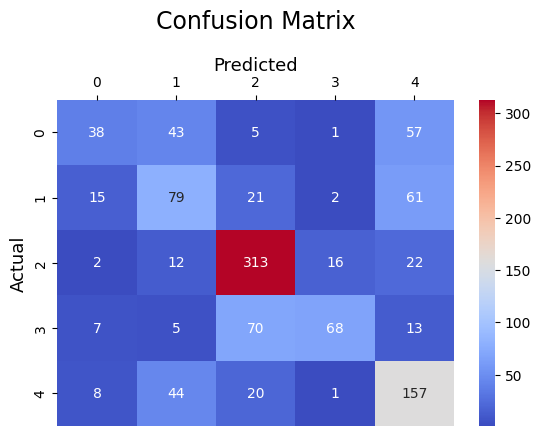

In [ ]:
y_pred = model_svm_tf.predict(x_test)
print("Klasifikasi TFID SVM\n")
findEvaluation(y_test, y_pred)

Klasifikasi Count SVM

[[ 32  46   8   1  57]
 [  9  88  19   1  61]
 [  0  15 311  19  20]
 [  0  11  66  64  22]
 [ 10  41  24   2 153]]
Accuracy: 60.0
Precision: 60.32695029932656
Recall: 52.53028934657687
F1-Score: 53.049683296853814
              precision    recall  f1-score   support

           0       0.63      0.22      0.33       144
           1       0.44      0.49      0.46       178
           2       0.73      0.85      0.78       365
           3       0.74      0.39      0.51       163
           4       0.49      0.67      0.56       230

    accuracy                           0.60      1080
   macro avg       0.60      0.53      0.53      1080
weighted avg       0.62      0.60      0.58      1080



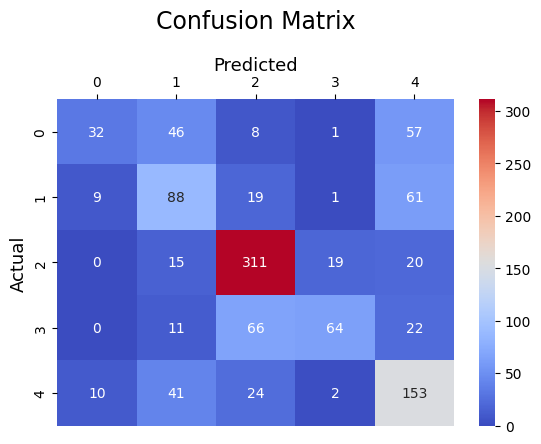

In [ ]:
y_pred = model_svm_co.predict(x_test)
print("Klasifikasi Count SVM\n")
findEvaluation(y_test, y_pred)

Klasifikasi Hash SVM

[[ 36  56   6   2  44]
 [ 14  83  20   2  59]
 [  0  12 315  16  22]
 [  0   5  74  65  19]
 [ 15  49  23   1 142]]
Accuracy: 59.351851851851855
Precision: 58.60439469620583
Recall: 51.90940287888785
F1-Score: 52.69903662698419
              precision    recall  f1-score   support

           0       0.55      0.25      0.34       144
           1       0.40      0.47      0.43       178
           2       0.72      0.86      0.78       365
           3       0.76      0.40      0.52       163
           4       0.50      0.62      0.55       230

    accuracy                           0.59      1080
   macro avg       0.59      0.52      0.53      1080
weighted avg       0.60      0.59      0.58      1080



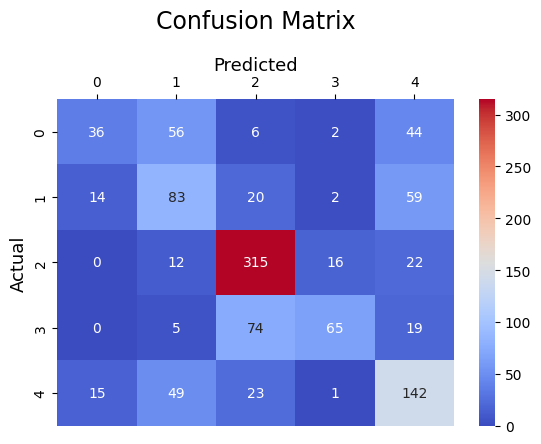

In [ ]:
y_pred = model_svm_hash.predict(x_test)
print("Klasifikasi Hash SVM\n")
findEvaluation(y_test, y_pred)